# Capstone Project: U.S. Farmers Markets and County Income Analysis

Abstract: Nutrition and health in the United States are closely related in the study of public health. Local farmers markets have proliferated as a means to distribute fresh produce directly to consumers, skipping the costly distribution and packaging step. However, one criticism of farmers markets is that they are largely inaccessible to many Americans, due to location, especially to those of low income and socio-economic status. This project draws upon all the registered farmers markets in the United States in 2020 as well as economic statistics for each county to investigate the correlation of income and access to farmers markets. This preliminary study used multiple regression modeling to find a positive correlation of the density of farmers markets in a county to the per capita income. However, there was a negative correlation of the density of farmers markets to the county’s median household/family income. Overall, there was no clear trend that greater income in a given county affected the density of farmers markets. Furthermore, county segmentation by K-means found an optimal of 3 clusters of counties by the elbow method. Four counties (Maricopa County, AZ; Los Angeles County, CA; Harris County, TX; and Cook County, IL) were identified as great potential for new farmers markets due to low market density, high population and relatively high income.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:     
        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Step 1 :  Read the document CustomrerMembers as s_memebers and SupermarketBranches as s_branches**

In [15]:
s_members = pd.read_csv('/Users/annettechiu/Downloads/datasets_407654_781147_supermarket_marketing_Supermarket_CustomerMembers.csv')
s_branches = pd.read_csv('/Users/annettechiu/Downloads/datasets_407654_781147_supermarket_marketing_50_SupermarketBranches.csv')

s_branches.shape,s_members.shape

((50, 5), (200, 5))

In [25]:
s_members.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
s_branches.head()

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


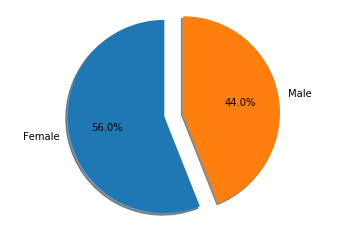

In [49]:
countsT = s_members['Genre'].value_counts()
labels = 'Female' ,'Male'
sizes = countsT.values
explode = (0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow= True, startangle=90)
ax1.axis('equal')  
plt.show()

**Step 3: Find the Age distribution**

Text(0.5, 0, 'Age')

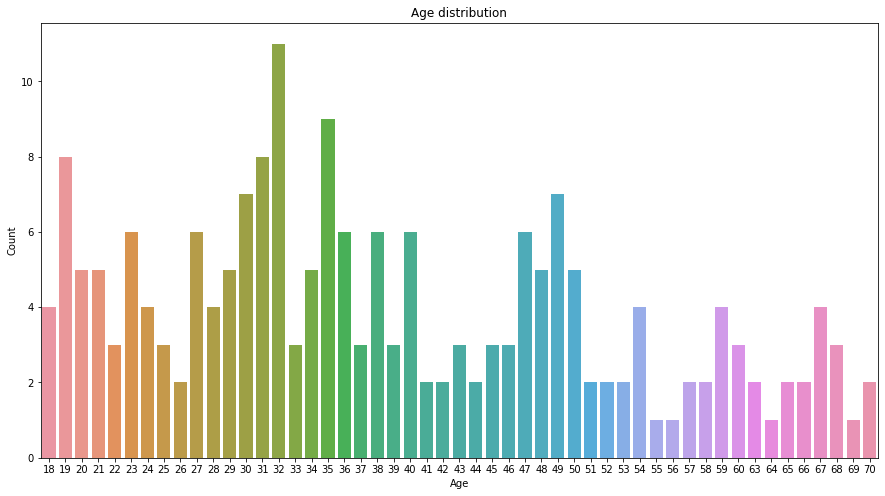

In [19]:
age_values = s_members.Age.value_counts()
age_labels = age_values.index
plt.figure(figsize=(15,8))
ax = sns.barplot(x=age_labels,y=age_values)
ax.set_title('Age distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Age')

In [30]:
result = s_members.groupby(['Genre']).size().reset_index(name='count')
print(result)

    Genre  count
0  Female    112
1    Male     88


In [21]:
s_members
#Average spending by a customer
fm_spending_avg = s_members.groupby('Genre')['Spending Score (1-100)'].sum()['Female']/112
print('Average spending by a female customer is {}'.format(fm_spending_avg))

m_spending_avg = s_members.groupby('Genre')['Spending Score (1-100)'].sum()['Male']/88
print('Average spending by a Male customer is {}'.format(m_spending_avg))

avg_spending = s_members['Spending Score (1-100)'].sum()/200
print('Average spending by a customer is {}'.format(avg_spending))

Average spending by a female customer is 51.526785714285715
Average spending by a Male customer is 48.51136363636363
Average spending by a customer is 50.2


Setting female and the male number valuable

In [38]:
female_number = s_members['Genre'].tolist().count('Female')
male_number = s_members['Genre'].tolist().count('Male')

print('Number of female customer is {}'.format(female_number))
print('Number of male customer is {}'.format(male_number))

Number of female customer is 112
Number of male customer is 88


**Average spending by Genre with the gender valuable**

In [35]:
s_members
#Average spending by a customer
fm_spending_avg = s_members.groupby('Genre')['Spending Score (1-100)'].sum()['Female']/female_number
print('Average spending by a female customer is {}'.format(fm_spending_avg))

m_spending_avg = s_members.groupby('Genre')['Spending Score (1-100)'].sum()['Male']/male_number
print('Average spending by a Male customer is {}'.format(m_spending_avg))

avg_spending = s_members['Spending Score (1-100)'].sum()/200
print('Average spending by a customer is {}'.format(avg_spending))

Average spending by a female customer is 51.526785714285715
Average spending by a Male customer is 48.51136363636363
Average spending by a customer is 50.2


**Average income by Genre with the gender valuable**

In [43]:
#Average income of a customer
fm_income_avg = s_members.groupby('Genre')['Annual Income (k$)'].sum()['Female']/female_number
print('Average income of a female customer is {}k'.format(fm_income_avg))

m_income_avg = s_members.groupby('Genre')['Annual Income (k$)'].sum()['Male']/male_number
print('Average income of a Male customer is {}k'.format(m_income_avg))

avg_income = s_members['Annual Income (k$)'].sum()/200
print('Average income of a customer is {}k'.format(avg_income))

Average income of a female customer is 59.25k
Average income of a Male customer is 62.22727272727273k
Average income of a customer is 60.56k


<Figure size 1080x576 with 0 Axes>

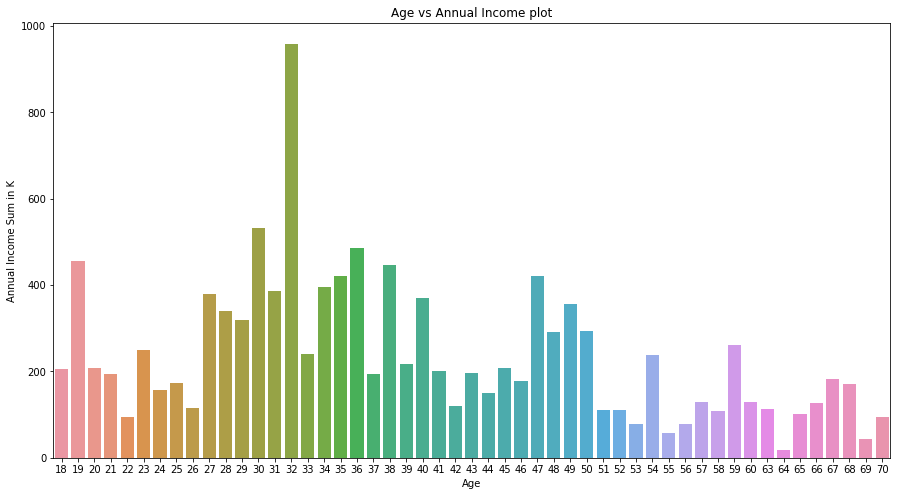

<Figure size 1080x576 with 0 Axes>

In [45]:
xn = s_members.groupby('Age')['Annual Income (k$)'].sum()
xn.reset_index(drop=False)
values = xn.values
labels = xn.index
plt.figure(figsize=(15,8))
ax=sns.barplot(x=labels,y=values)
ax.set_title('Age vs Annual Income plot')
ax.set_ylabel('Annual Income Sum in K')
ax.set_xlabel('Age')
plt.figure(figsize=(15,8))